# Task1

Task1.  
Model: y = ax + b  
Approach: Gradient Descent

## csv 파일 불러오기

In [54]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('hw1.csv')
print(data)

             x         y
0    -2.905540 -0.909465
1    -1.115315  0.467773
2    -1.297031  0.286476
3    -3.886326 -0.750273
4    -1.653190 -0.040699
...        ...       ...
1795 -1.348105  0.229674
1796 -3.588599 -0.867838
1797 -1.327915  0.241262
1798 -1.855616 -0.231748
1799 -2.491574 -0.821549

[1800 rows x 2 columns]


## 데이터 모양 확인하기

<function matplotlib.pyplot.show(close=None, block=None)>

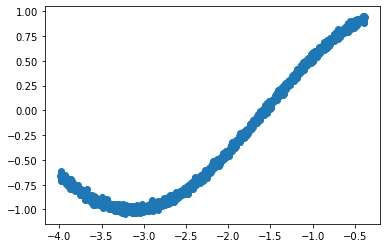

In [116]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('hw1.csv')

plt.plot(df["x"],df["y"],'o',label='x')
plt.show

In [118]:
m = len(df)
x=df['x']

def hypo(theta0,theta1,x):
    return theta0+theta1*x

def J_func(alpha,x,y):
    
    optimum=True
    theta0=1.0
    theta1=-1.0
    #optimum_mse=0
    
    while optimum:
    
        #25쪽
        Jtheta0 = sum([(hypo(theta0,theta1,x[i])-y[i]) for i in range(1,m)])/m
        Jtheta1 = sum([(hypo(theta0,theta1,x[i])-y[i])*x[i] for i in range(1,m)])/m

        #44쪽
        #alpha : learning rate (how much you increase the parameters at each iteration)
        temp0 = theta0 - alpha*Jtheta0
        temp1 = theta1 - alpha*Jtheta1

        theta0 = temp0
        theta1 = temp1
        
        #10쪽
        mse = sum([(hypo(theta0,theta1,x[i])-y[i])**2 for i in range(1,m)])/(2*m)
        
       #for i in range(m):
        #    if mse[i]<mse[i+1]:
         #       optimum_mse=mse[i]

        if mse <0.03287:
            print("break MSE<0.03287")
            print(mse)
            break
        
    
    return theta0, theta1, mse

[theta0, theta1, mse] = J_func(0.01,df['x'],df['y'])
print("---------------------------------------------------\n")
print("theta0 : {0}\ntheta1 : {1}\nmse : {2}\n".format(theta0,theta1,mse))
    

break MSE<0.03287
0.0328664384817869
---------------------------------------------------

theta0 : 0.7922731811835595
theta1 : 0.5188916887284325
mse : 0.0328664384817869



0.7922731811835595 0.5188916887284325


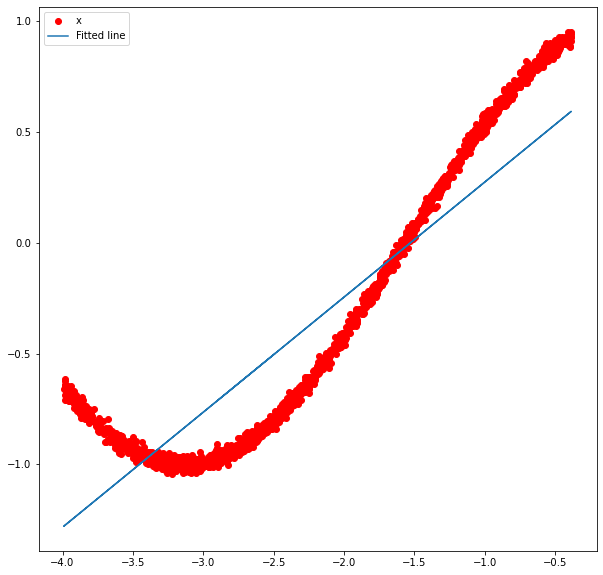

In [123]:
plt.plot(df['x'],df['y'], 'ro', label='x')
plt.plot(df['x'], np.array(theta1*df['x']+theta0), label='Fitted line')
plt.legend()
plt.show
print(theta0,theta1)

# Task2

Task2.  
Model: y = ax2 + bx + c  
Approach: Normal Equation

### y = a*^2 + b*x + c 에서, 

c = beta[0]  
b = beta[1]  
a = beta[2]


In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('hw1.csv')

df['x0']=1
df['x2']=df['x']*df['x']

df_X = pd.concat([df['x0'],df['x'],df['x2']], axis=1)
print(df_X)

      x0         x         x2
0      1 -2.905540   8.442163
1      1 -1.115315   1.243927
2      1 -1.297031   1.682289
3      1 -3.886326  15.103529
4      1 -1.653190   2.733038
...   ..       ...        ...
1795   1 -1.348105   1.817387
1796   1 -3.588599  12.878043
1797   1 -1.327915   1.763359
1798   1 -1.855616   3.443312
1799   1 -2.491574   6.207943

[1800 rows x 3 columns]


## 연산하고자 하는 식 : [ {(X^T * X)-1} * X^T ] * y

### 행렬에서는 연산 순서가 중요하기 때문에 나눠서 진행하기

X_transpose = X^T

X_Transpose_dot = X^T * X

inverse_X_dot_X_1 = (X^T * X)-1 (역행렬)

inverse_X_dot_X_T = {(X^T * X)-1} * X^T

beta = [ {(X^T * X)-1} * X^T ] * y


In [108]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('hw1.csv')

df['x0']=1
df['x2']=df['x']*df['x']

df_X = pd.concat([df['x0'],df['x'],df['x2']], axis=1)


def normal_equation(df_X,y):
    X_Transpose = np.transpose(df_X) #X^T
    X_Transpose_dot = X_Transpose.dot(df_X) #X^T * X
    inverse_X_dot_X_1 = np.linalg.inv(X_Transpose_dot) #(X^T * X)-1 (역행렬)
    inverse_dot_X_T = inverse_X_dot_X_1.dot(X_Transpose) #{(X^T * X)-1} * X^T
    theta = inverse_dot_X_T.dot(y) #[ {(X^T * X)-1} * X^T ] * y
    
    print(theta)
    
    c = theta[0]
    b = theta[1]
    a = theta[2]
    print(a, b, c)

    return a,b,c

[a,b,c]=normal_equation(df_X,df['y'])
print("---------------------------------------\n")
print("a : {0}\nb : {1}\nc : {2}\n".format(a,b,c))

[1.79080828 1.57064935 0.22677466]
0.22677466220662137 1.5706493512010855 1.7908082788458568
---------------------------------------

a : 0.22677466220662137
b : 1.5706493512010855
c : 1.7908082788458568



## 그래프 그리기

<function matplotlib.pyplot.show(close=None, block=None)>

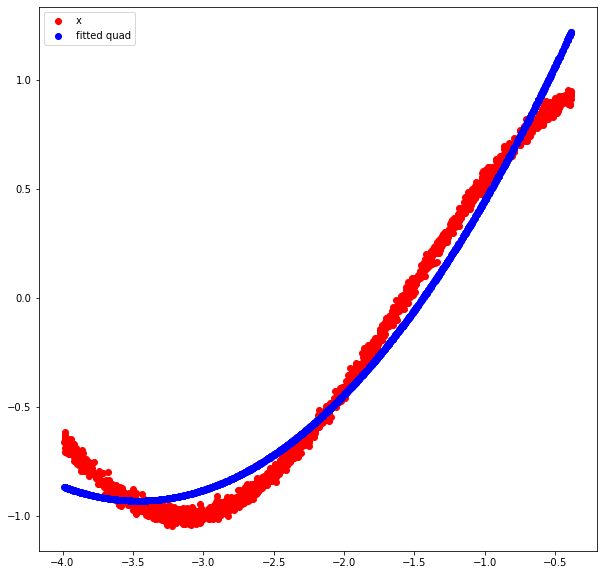

In [111]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(df['x'], df['y'], 'ro', label = 'x')
plt.plot(df['x'],np.array(a*df['x2'] + b*df['x'] + c), 'ro', label = 'fitted quad', color = 'blue')
plt.legend()
plt.show

## Comparison

y=ax+b in normal equation

In [120]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('hw1.csv')

df['x0']=1

df_X = pd.concat([df['x0'],df['x']], axis=1)


def normal_equation(df_X,y):
    X_Transpose = np.transpose(df_X) #X^T
    X_Transpose_dot = X_Transpose.dot(df_X) #X^T * X
    inverse_X_dot_X_1 = np.linalg.inv(X_Transpose_dot) #(X^T * X)-1 (역행렬)
    inverse_dot_X_T = inverse_X_dot_X_1.dot(X_Transpose) #{(X^T * X)-1} * X^T
    theta = inverse_dot_X_T.dot(y) #[ {(X^T * X)-1} * X^T ] * y
    
    print(theta)
    
    
    theta0 = theta[0]
    theta1 = theta[1]
    print(theta0, theta1)

    return theta0, theta1

[a,b]=normal_equation(df_X,df['y'])
print("---------------------------------------\n")
print("theta0 : {0}\ntheta1 : {1}\n".format(theta0, theta1))

[0.97050391 0.58834255]
0.9705039110785048 0.5883425532067126
---------------------------------------

theta0 : 0.7922731811835595
theta1 : 0.5188916887284325



<function matplotlib.pyplot.show(close=None, block=None)>

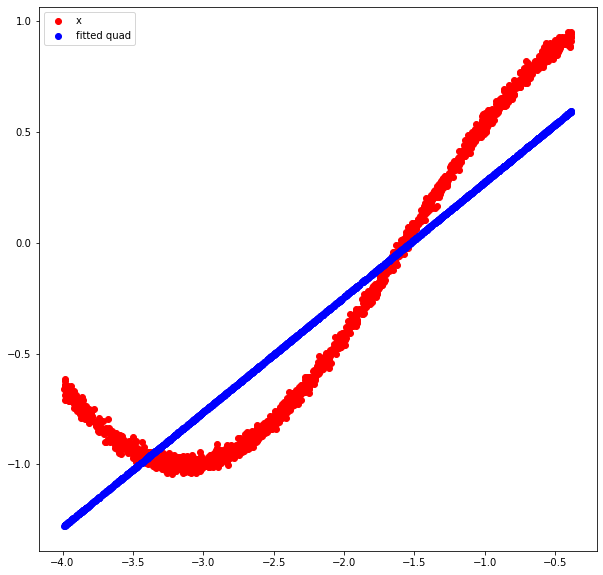

In [122]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(df['x'], df['y'], 'ro', label = 'x')
plt.plot(df['x'],np.array(theta1*df['x'] + theta0), 'ro', label = 'fitted quad', color = 'blue')
plt.legend()
plt.show